# Import des paquets
Les différents paquets sont importés.
En plus, `matplotlib` est configuré pour avoir des figures un peu plus "sympa" !

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import signal

matplotlib.style.use('fivethirtyeight')
plt.rcParams["font.sans-serif"] = "Raleway"

# Calcul du filtre numérique théorique
Le filtre numérique est un filtre moyenneur de taille $16$. La fonction `freqz` calcule la fonction de transfert numérique d'un filtre. Cette fonction de transfert est calculée pour les pulsations numériques normalisée de $0$ à $0.5$. Il est nécessaire de les convertir en fréquences "analogique" (dont les valeurs sont liées à la fréquence d'échantillonage) pour pouvoir les afficher sur le même diagramme que les mesures pratiques. Quelques `RuntimeWarning` vont se produire car la fonction de transfert contient des $0$ qui ne peuvent pas être convertis en $dB$.

In [19]:
FECH=50000
N=16
w_th,h_th=signal.freqz( (1/N)*np.ones(N),1)
f_th=(w_th/np.pi)*(FECH/2)
g_th= 20 * np.log10(abs(h_th))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


# Lecture des données pratiques
Les données issues des mesures automatiques sont converties en flottants et placées dans un `array` pour simplifier les calculs ultérieurs. Les valeurs de fréquences sont utilisables directement par contre, il faut calculer le gain en décibels à partir des valeurs de tension d'entrée et de sortie.

In [20]:
resultats = []
with open("MesuresFiltreNumerique.csv", "r") as f:
    reader = csv.reader(f, delimiter=',')    
    next(reader, None) # pour supprimer la première ligne
    for line in reader:
        resultats.append([float(_) for _ in  line ])
results = np.array(resultats)
f_me = results[:, 0]
g_me = 20 * np.log10(results[:, 2] / results[:, 1])

# Affichage des résultats
Les valeurs issues des calculs théoriques et des mesures sont affichées sur le même graphes à l'aide de `matplotlib`.

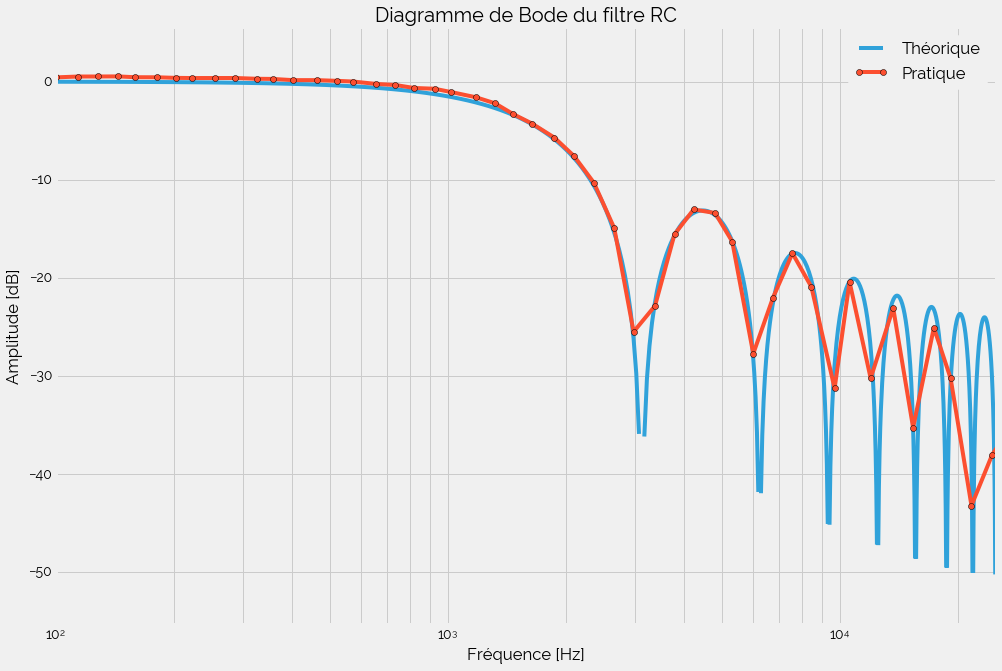

In [21]:
plt.figure(figsize=(15, 10))
plt.semilogx(f_th, g_th, '-')
plt.semilogx(f_me, g_me, '-o')
plt.grid(True, 'minor')
plt.grid(True, 'major')
plt.ylabel('Amplitude [dB]')
plt.xlabel(u'Fréquence [Hz]')
plt.xlim((100,25000))
plt.title("Diagramme de Bode du filtre RC")
plt.legend(("Théorique","Pratique"))
plt.margins(0.1, 0.1)
plt.savefig("FiltreNumeriqueGain.png")
plt.show()

# Représentation de la phase
Pour les filtres numérique la phase est raremment représentée. Etant déjà peut précise pour le filtre analogique, elle n'a pas été représentée pour le filtre numérique.